# Исследование закономерностей, определяющих успешность игр

В нашем распоряжении исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы - доступные из открытых источников. Нужно выявить определяющие успешность игр закономерности. Наша задача - сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Цель исследования** - выполнить следующие задачи:

1. Посмотреть, сколько игр выпускалось в разные годы.
2. Посмотреть, как менялись продажи по платформам.
3. Выбрать данные за актуальный период.
4. Узнать какие платформы лидируют по продажам, растут или падают.
5. Построить график по глобальным продажам игр в разбивке по платформам.
6. Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.
7. Соотнести выводы с продажами игр на других платформах.
8. Посмотреть на общее распределение игр по жанрам. 
9. Составить портрет пользователя каждого региона.
10. Проверить две гипотезы:
                          1) Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
                          2) Средние пользовательские рейтинги жанров Action и Sports разные.

**Ход исследования** 

Данные мы получим из файла  `/datasets/games.csv`. О качестве данных нам ничего не известно. Значит перед исследовательской работой понадбится обзор данных. 

Проверим общую информацию данных, затем проведём предобработку, чтобы исправить самые критичные ошибки.

Исследование пройдёт в четыре этапа:
 1. Обзор данных.
 2. Предобработка данных.
 3. Исследовательский анализ.
 4. Проверка гипотез.

## Откроем файл с данными и изучим общую информацию

In [1]:
#импортируем библиоткеи pandas, numpy, matplotlib
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
#прочитаем csv_файл
games = pd.read_csv('/datasets/games.csv')

In [3]:
#выведем первые 10 строк таблицы
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
#выведем основную информацию о таблице методом info()
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


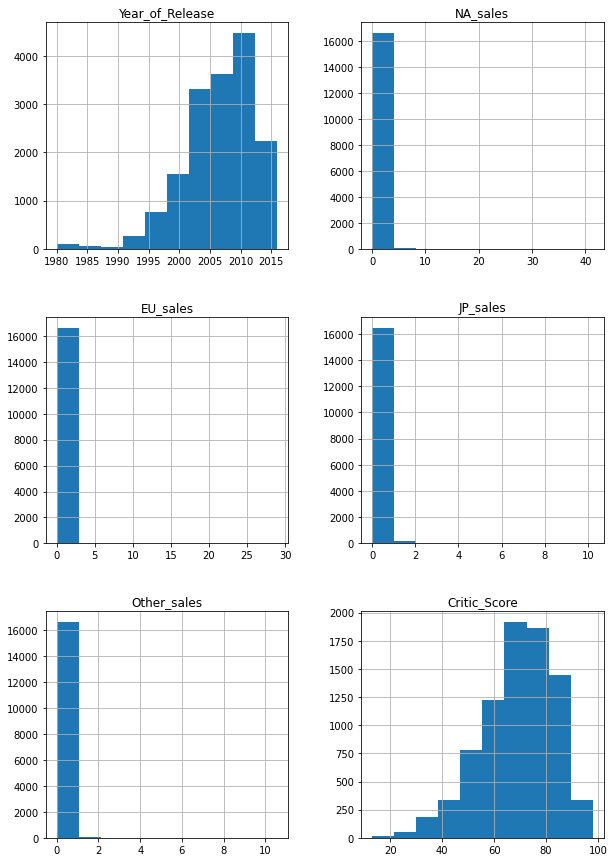

In [5]:
#построим гистограммы для всех столбцов
games.hist(figsize=(10, 15))
plt.show();

**Выводы**

В каждой строке таблицы - данные об играх. Часть колонок описывает игры: название, жанр, платформа выпуска, год выпуска. Другие колонки описывают оценки и продажи: продажи в разных регионах, оценки критиков и игроков, возрастной рейтинг.

На первый взгляд кажется, что данных достаточно для исследования и проверки гипотез. Но мы видим следующее: в таблице присутствуют пропуски, названия столбцов не соотвествуют хорошему стилю, некоторым столбцам установлен не тот тип данных. По первичным гистограммам сложно сделать некоторые выводы.

Приступим к предобработке данных.

## Предобработка данных

### Приведём к нижнему регистру названия столбцов

In [6]:
#посмотрим на названия столбцов
games.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [7]:
#приведём названия в соответствие с хорошим стилем
games.columns = games.columns.str.lower()

In [8]:
#проверим результат
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Найти и изучить пропущенные значения в столбцах

In [9]:
#выведем количество пропущенных значений для каждого столбца
games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [10]:
#проверим колличество пропусков в %
pd.DataFrame(round(games.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,2.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.000000
user_score,40.000000


Поясним, какие значения пропущены и как их можно обработать:

* **name** - в столбце всего 2 пропуска, но поскольку узнать их названия никак не можем, то удалим эти пропуски
* **year_of_release** - мы можем узнать год релиза, но для этого нужно проверять отдельно каждую игру. Поскольку проверять каждую игру отнимет довольно много времени, а пропусков меньше 2%, то можем смело удалить их, чтобы не терять время
* **genre** - в столбце всего 2 пропуска, но поскольку узнать их жанр никак не можем, то удалим эти пропуски
* **critic_score** - оставим NaN, т.к. мы никак не можем узнать оценку критиков
* **user_score** - оставим NaN, т.к. мы никак не можем узнать оценку игроков
* **rating** - поскольку столбец заполнен категориальными значениями, а для выполнения операций отсутствующее значение мешает. Заменим его на пустую строку.

Больше всего пропусков у нас в следующих столбцах: оценка критиков и игроков, возрастной рейтинг. Поскольку данные были получены из открытых источников, то можно предположить, что выгрузка производилась из разных мест. Есть вероятность, что часть данных была потеряна из-за технических неисправностей при выгрузке. Ещё есть вероятность, что данные выгружались из мест, в которых хранилась только общая информация об играх, а оценка отсутствовала.

Самое главное предположение в том, что в мире очень много сервисов и сайтов, где игроки и критики ставят свои оценки. При выгрузке из разных источников мог просто произойти конфликт данных. Вполне вероятно, что такие спорные места заменили на пустое значение.

Возрастной рейтинг появился в 1994 году для Американского и Европейского рынка, а в Японии он появился в 1992 году. До этих дат отсутствие рейтинга понятно. 

Пропуски в столбце "год релиза" могут быть техническими, так и данные могли взять из места, где год не указали.

In [11]:
#если пропусков меньше 5-10% их лучше сразу удалить, дабы сэкономить время
games = games.dropna(subset=['year_of_release', 'name', 'genre']).reset_index(drop=True)

#заменим пропуски в возрастном рейтинге на пустую строку 
games['rating'] = games['rating'].fillna(value='') 

#проверим результат
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,


In [12]:
#проверим значения в рейтинге игроков
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Видим аббревиатуру **tbd** (to be determined = будет определено). Оценка игроков появляется не сразу, а когда определённое количество людей поставили свою оценку. Эта аббревиатура можеть быть по следующим причинам:

* Игра продалась очень маленьким тиражом и её оценило недостаточное количество игроков.
* Игра только вышла и оценка ещё не появилась на момент выгрузки.
* Поскольку игры добавляются на сайты/сервисы с оценками вручную, то многие нишевые и старые игры появляются там с сильным запозданием, из-за чего оценки может и не быть.

**Важное примечание**

Поскольку эти значения мы никак обработать не сможем, то просто заменим их на NaN. Это действие мы произведём на следующем шаге, когда будем изменять тип user_score методом to_numeric. У этого метода есть параметр errors. От значений, принимаемых errors, зависят действия to_numeric при встрече с некорректным значением. Мы будем использовать значение coerce - некорректные значения принудительно заменяются на NaN

### Изменение типов данных

Столбцы, в которых можно изменить тип данных:

* **year_of_release** - поскольку здесь записан только год, а не целая дата, то переведём в целочисленный тип.
* **user_score** - переведём в вещественный тип, поскольку пользователи ставят дробную оценку.

In [13]:
#изменим тип столбца год релиза в целочисленный
games['year_of_release'] = games['year_of_release'].astype('int')

#изменим тип столбца ретинг пользователей с object на вещественный
#также заменим tbd значения на NaN, используя errors='coerce'
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce') 

### Посчитаем суммарные продажи во всех регионах и запишим их в отдельный столбец

In [14]:
#посчитаем суммарные продажи
games['all_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,,31.38


### Проверим явные и неявные дубликаты, а также аномальные значения

In [15]:
#проверим наличие явных дубликатов в таблице
games.duplicated().sum()

0

Никаких явных дубликатов в данных не обнаружено.

Проверим выбросы в столбцах и поймём, нужно их обрабатывать или нет

In [16]:
#оценим данные в таблице методом describe
games.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,all_sales
count,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000,7983.000000,7463.000000,16444.000000
mean,2006.486256,0.264012,0.145930,0.078487,0.047594,68.994363,7.126330,0.536023
std,5.875525,0.818378,0.506716,0.311100,0.188005,13.920060,1.499447,1.558786
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000,0.470000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000,82.540000


По максимальным и минимальным значениям можно сказать, что никаких аномальных данных нету. 

Просмотрим столбцы, которые ещё не изучили

In [17]:
#выведем уникальные названия платформ
games['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [18]:
#выведем уникальные названия жанров
games['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [19]:
#выведем уникальные наименования возрастного рейтинга
games['rating'].unique()

array(['E', '', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Можно сделать вывод, что неявные дубликаты отсутствуют в данных.

**Выводы**

Предобработка обнаружила следующие проблемы в данных:
- названия столбцов не в нижнем регистре
- пропущенные значение
- неправильный тип данных

Исправленные заголовки помогут упростить работу с таблицей. 

Обработка пропущенных значений поможет нам провести более точное исследование. В некоторых столбцах мы оставили NaN значения. В исследовании мы увидим, помешают нам пропуски или нет.

Изменение типа данных поможет нам провести более точные расчёты.

Никаких дубликатов и аномальных значений мы не обнаружили.

In [20]:
# Комментарий ревьюера
# Посмотрим, что у нас осталось
temp = games.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  all_sales        16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
n

## Исследовательский анализ данных

### Изучим, сколько игр выпускалось в разные годы

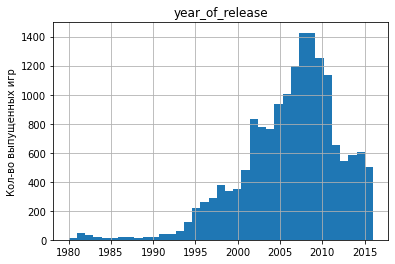

In [21]:
games.hist('year_of_release', bins=37)
plt.ylabel('Кол-во выпущенных игр')
plt.show()

По гистограмме можно сказать, что игровая индустрия начала сильно развиваться с середины 90-х годов. Больше всего игр было выпущено с 2007 по 2011 год. С 2012 заметен резкий спад. Это связано с тем, что из-за технологического прогресса многие игры перестали выпускаться на устаревшие платформы. 

### Изучим, как менялись продажи по платформам

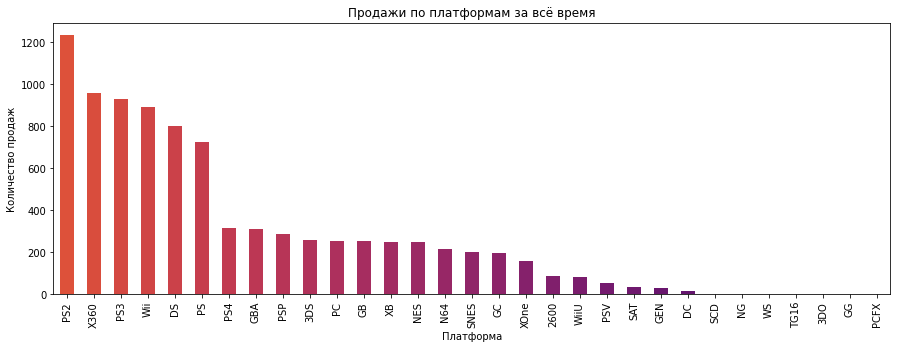

In [22]:
#построим график продаж по платформам за всё время
from matplotlib import cm
color = cm.inferno_r(np.linspace(.4, .8, 30))

a_p = games.groupby('platform')['all_sales'].sum().sort_values(ascending=False)
a_p.plot(x='platform', y='all_sales', kind='bar', color=color, figsize=(15, 5), title='Продажи по платформам за всё время')
plt.xlabel('Платформа')
plt.ylabel('Количество продаж')
plt.show()

По графику видно, что топ 5 игровых платформ за всё время это PS2, X360, PS3, Wii, DS.

Поскольку нам нужно сделать ставку на потенциально популярные продукты, то в дальнейшем исследовании будем учитывать данные с 2013 года, ибо в 2013 вышло новое поколение самых популярных платформ. 

### Изучим, какие платформы лидируют по продажам, растут и падают

In [23]:
#сделаем срез с 2012 года и посмотрим на продажи игр по платформам
(games
 .query('year_of_release >= 2012')
 .pivot_table(index='year_of_release', columns='platform', values='all_sales', aggfunc='sum'))

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2012,51.36,11.01,23.22,107.36,NaN,7.69,16.19,21.71,17.56,99.74,NaN
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


Исходя из полученных данных можно сказать следующее:

* PS4, XOne, PC, 3DS, WiiU - самые популярные платформы, на которые нужно ориентироваться. PS4 очень сильно лидирует по продажам.
* На PC хоть и заметно, что суммарные продажи падают с каждым годом, но исключать PC не будем, ибо многие игры выходят помимо актуальных консолей ещё и на PC. Просто консоли имеют большую популярность.
* 3DS и WiiU хоть и имеет много продаж, но в 2016 был слишком сильный спад. Есть вероятность, что в 2017 этот спад только продолжится.
* DS и PSP можно больше не рассматривать, ибо их поддержка прекратилась. Wii также можно не рассматривать.
* PS3, X360 не рассматриваем в дальнейшем, ибо являются устаревшим поколением.
* PSV с каждым годом всё менее актуальны, скорее всего, в 2017 спад продолжится.

In [24]:
#создадим таблицу за актуальный период
actual_games = (games
                .query('year_of_release >= 2012 and platform == ["PS4", "XOne", "PC", "3DS", "WiiU"]'))
actual_games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,,11.68
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
62,New Super Mario Bros. 2,3DS,2012,Platform,3.66,3.14,2.47,0.63,78.0,7.2,E,9.90


### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам

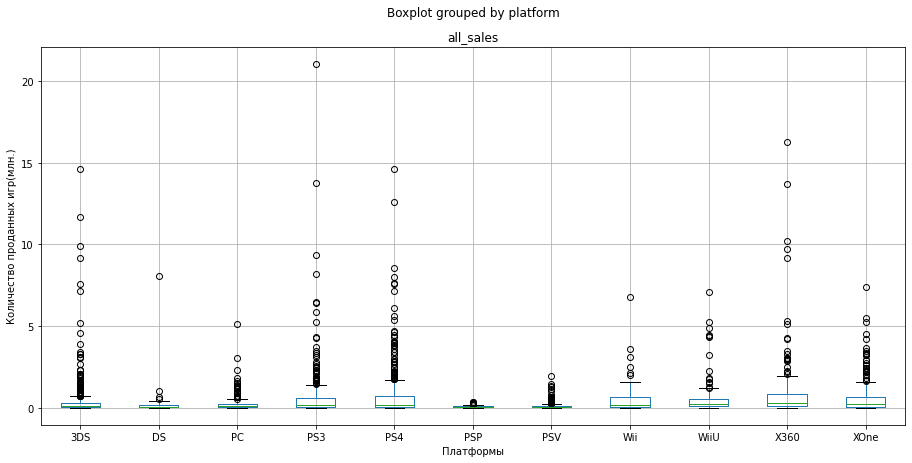

In [25]:
#создадим диаграмму размаха глобальных продаж игр по платформам
actual_games.boxplot(column='all_sales', by='platform', figsize=(15, 7))
plt.xlabel('Платформы')
plt.ylabel('Количество проданных игр(млн.)')
plt.show()

Можно заметить, что большая часть значений у PS4, Xbox one и WiiU ± одинаковая. Выделим PS4 и 3DS, ибо у них есть отдельные игры, которые продаются очень большим тиражом. 

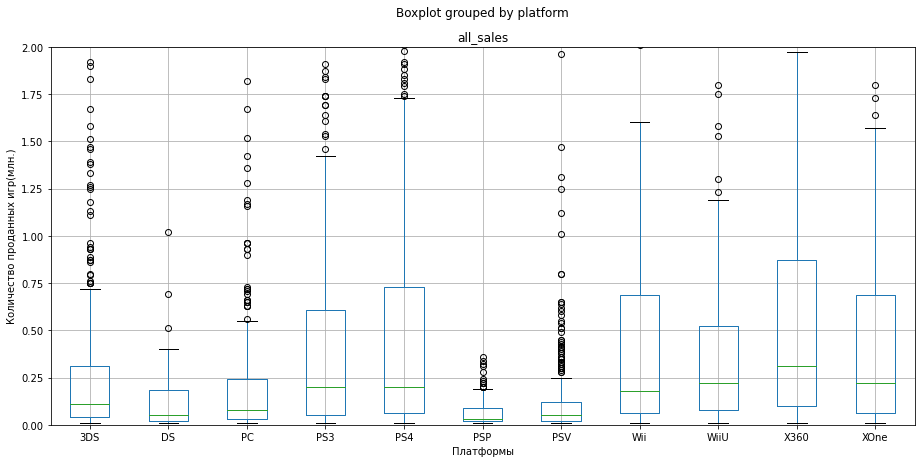

In [26]:
#создадим ещё одну диаграмму размаха
actual_games.boxplot(column='all_sales', by='platform', figsize=(15, 7))
plt.ylim(0, 2)
plt.xlabel('Платформы')
plt.ylabel('Количество проданных игр(млн.)')
plt.show()

Из диаграммы размахы мы видим, что самыми прибыльными платформами являются PS3, PS4, Wii, WiiU, X360, Xone, ибо их медиана самая большая. Но нужно учесть, что PS3, X360 и Wii уже устаревшие платформы, и для итогового результата они нам не понадобятся

### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков

Коэффициент корреляции между отзывами пользователей и продажами для PS4: -0.031957110204556376
Коэффициент корреляции между отзывами критиков и продажами для PS4: 0.406567902061781


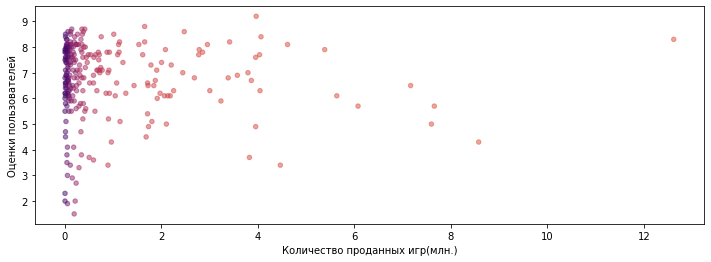

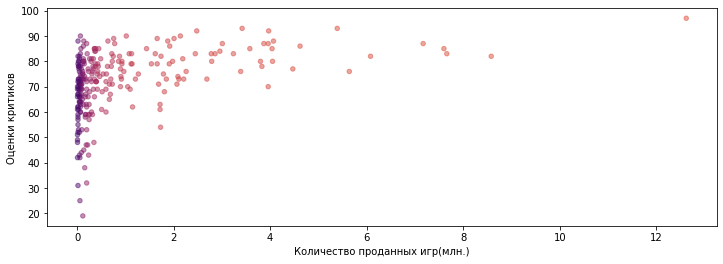

In [27]:
def display_diag_corr(platform: str):
    scores = actual_games.query('platform == @platform')
    color = cm.inferno_r(np.linspace(.4, .8, len(scores)))
    dictionary = {'user_score': 'пользователей', 'critic_score': 'критиков'}    
    for score, name in dictionary.items():
        scores.plot(x='all_sales', y=score, kind='scatter', color=color, figsize=(12, 4), alpha=0.5)
        plt.xlabel('Количество проданных игр(млн.)')
        plt.ylabel(f'Оценки {name}')
        
        print(f'Коэффициент корреляции между отзывами {name} и продажами для {platform}:'\
        ,scores['all_sales'].corr(scores[score]))
    
display_diag_corr('PS4') 

Можно сказать следующее:

- Самые частые оценки пользователей от 6 до 8.5
- Обычные игроки более придирчивы к играм. Они могут поставить низкие оценки, но игра всё равно продастся большим тиражом.
- Отрицательная корреляция близкая к нулю говорит о том, продажи практически никак не связаны с отзывами пользователей.
- Самые часты оценки критиков от 60 до 82
- Корреляция в 0.40 говорит о наличии слабой связи между отзывами критиков и продажами.

Соотнесём выводы с продажами игр на других платформах



Коэффициент корреляции между отзывами пользователей и продажами для XOne: -0.06892505328279412
Коэффициент корреляции между отзывами критиков и продажами для XOne: 0.41699832800840175


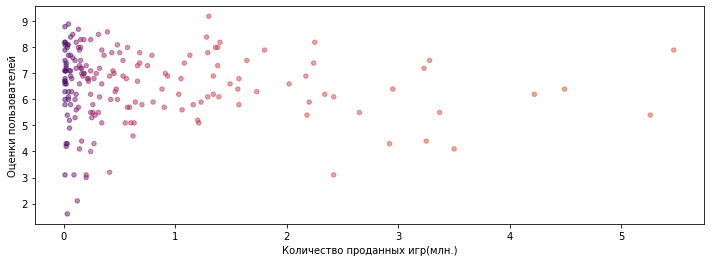

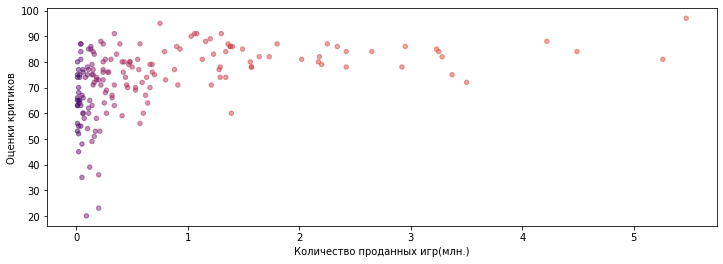

In [28]:
display_diag_corr('XOne') 

Коэффициент корреляции между отзывами пользователей и продажами для PC: -0.12186747630735577
Коэффициент корреляции между отзывами критиков и продажами для PC: 0.23724324311567918


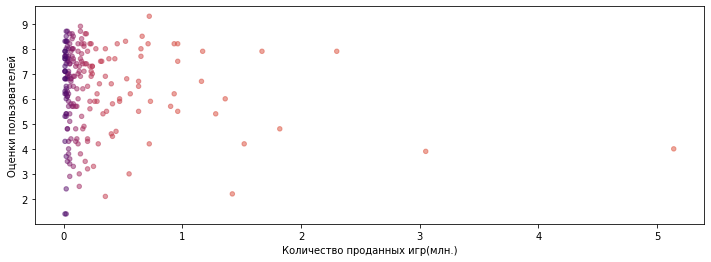

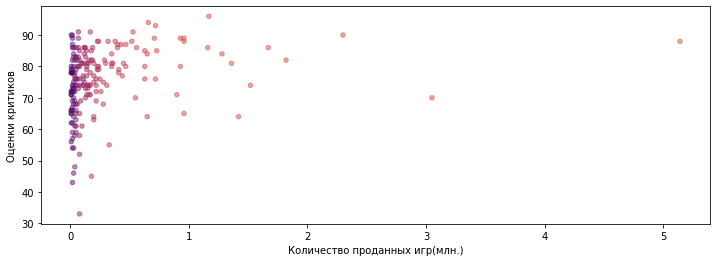

In [29]:
display_diag_corr('PC') 

Коэффициент корреляции между отзывами пользователей и продажами для WiiU: 0.4002190202148617
Коэффициент корреляции между отзывами критиков и продажами для WiiU: 0.3483797601201749


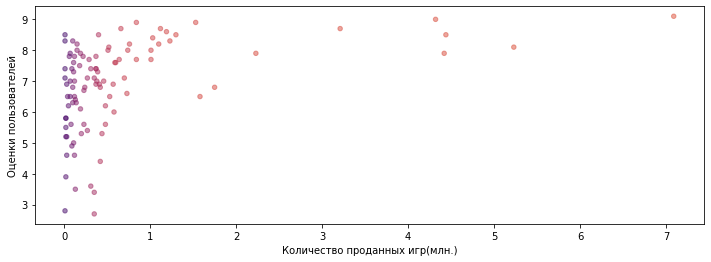

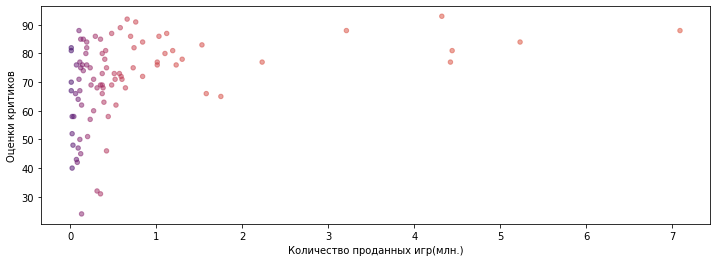

In [30]:
display_diag_corr('WiiU')

Коэффициент корреляции между отзывами пользователей и продажами для 3DS: 0.19758263411038596
Коэффициент корреляции между отзывами критиков и продажами для 3DS: 0.32080286953607845


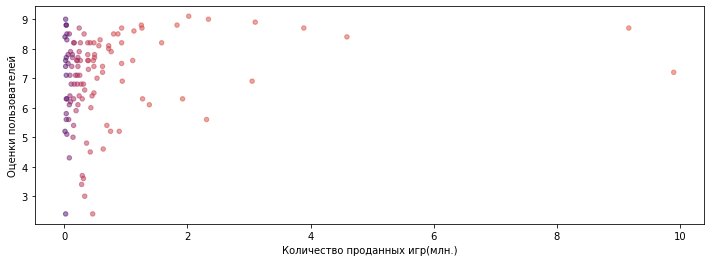

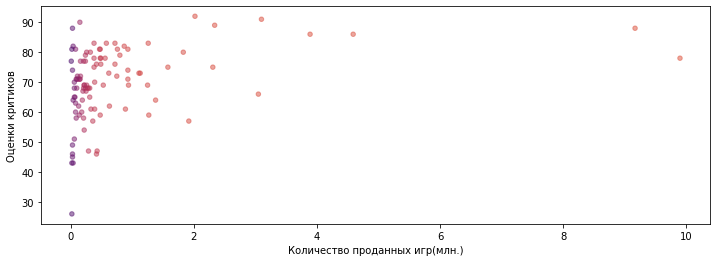

In [31]:
display_diag_corr('3DS')

Изучив все данные мы видим:

* Для всех изученных платформ оценки критиков влияют на продажи.
* Сильнее всего оценки игроков имеют влияние на продажи игр для WiiU, следом идёт 3DS.
* Для PS4, Xbox One, PC оценки игроков практически не влияют на продажи.
* Сильнее всего оценки критиков влияют на продажи игр для PS4 и Xbox One, а меньше всего для PC.

### Посмотрим на общее распределение игр по жанрам

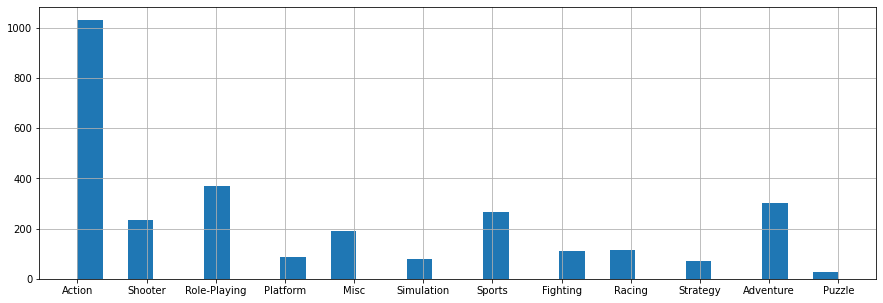

In [32]:
#посмотрим на общее количество выпущенных игр по жанрам
actual_games['genre'].hist(bins=30, figsize=(15, 5))
plt.show()

Самое большое количество выпущенных игр было в жанре экшен. Количество шутеров вышло немного больше, нежели ролевых, спортивных, приключенческих и гоночных игр. Меньше всего выпускалось пазлов.

Количество выпущенных игр по жанрам мы узнали, а теперь посмотрим на самые прибыльные жанры.

In [33]:
#посчитаем общее количество продаж по жанрам
a_g = (actual_games
       .pivot_table(index='genre', values='all_sales', aggfunc='sum')
       .sort_values('all_sales', ascending=False))
a_g

,all_sales
genre,
Action,441.12
Shooter,304.73
Role-Playing,192.80
Sports,181.07
Misc,85.04
Platform,61.00
Racing,53.50
Fighting,44.49
Simulation,35.12


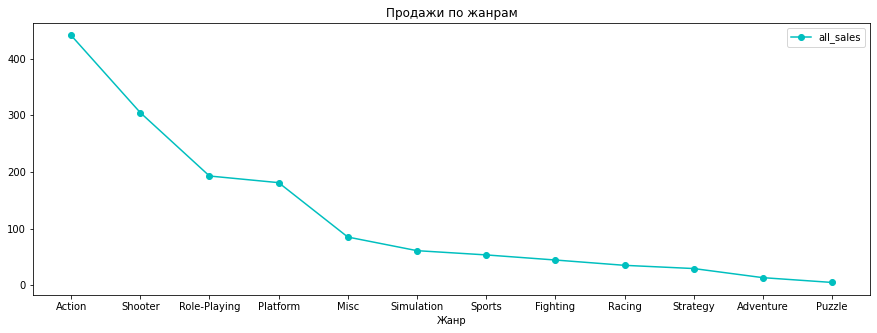

In [34]:
#построим линейный график для визуализации
a_g.plot(style='o-', figsize=(15, 5), color='c', title = 'Продажи по жанрам')
plt.xticks(np.arange(len(a_g)), actual_games['genre'].unique())
plt.xlabel('Жанр')
plt.show()

По полученной таблице и графику мы видим:

* Самый прибыльный жанр - шутер. Хоть экшен-игры и находятся рядом, но нужно учитывать, что их выпускалось в несколько раз больше. 
* Ролевые тоже очень популярны и на них стоит обратить внимание.
* Спортивные игры тоже не стоит обходить стороной, хоть шутеры и пользуются большей популярностью. Но если будет стоять выбор между шутерами и спортивными, то лучше выбрать шутеры. 
* Гоночные игры продаются лучше, чем приключенческие

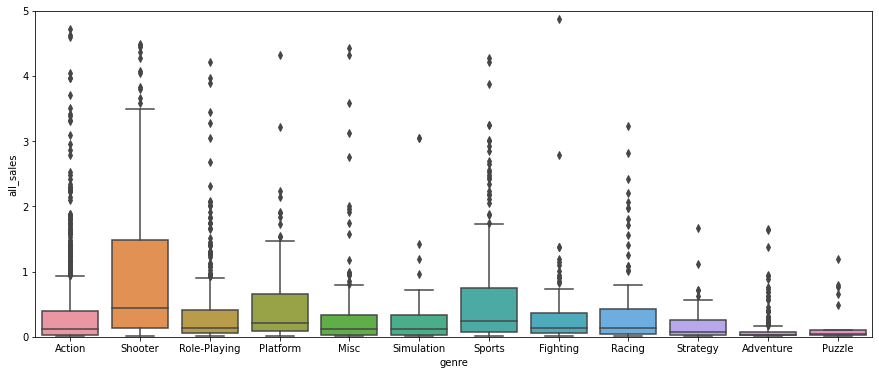

In [35]:
#сравним продажи по диаграмме размаха
import seaborn as sns
plt.figure(figsize=(15, 6))
plt.ylim(0,5)
sns.boxplot(x='genre', y='all_sales', data=actual_games)
plt.show()

По диаграмме размаха мы действительно видим, что шутеры являются самым прибыльным жанром, поскольку медиана самая большая из всех. Хуже всех продаются пазлы, приключения и стратегии, они имеют самый маленький размах. 

**Выводы**

* В ходе исследования мы выяснили сколько игр выпускалось в разные годы.
* Узнали какие платформы имели больше всего продаж за всё время - PS2, X360, PS3, Wii
* Определили, что нам важны данные с 2013 года и только для популярных платформ - PS4, Xbox One, PC, 3DS, WiiU. 
* Поняли, что отзывы игроков практически не влияют на продажи, а вот отзывы критиков имеют небольшое влияние на продажи.  
* Определили самые прибыльные жанры - Shooter, Role-Playing, Action, Sports

## Составим портрет пользователя каждого региона (NA, EU, JP)

### Самые популярные платформы и жанры (топ 5) в Северной Америке

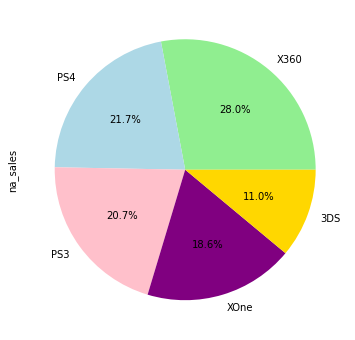

In [36]:
#самые популярные платформы пользователей в Северной Америке
colors = ['lightgreen', 'lightblue', 'pink', 'purple', 'gold']
na_region = (actual_games
             .groupby('platform')
             .agg(na_sales=('na_sales', 'sum'))
             .sort_values(by='na_sales', ascending=False)
             .head()
             .plot(y='na_sales', kind='pie', autopct='%1.1f%%', colors=colors, figsize=(6, 6), legend=False)
            )
plt.show()

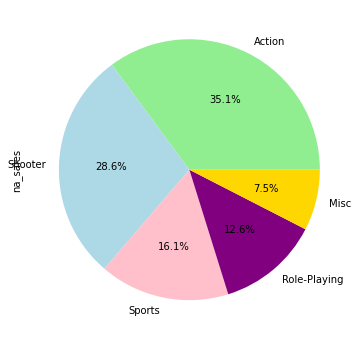

In [37]:
#самые популярные жанры пользователей в Северной Америке
colors = ['lightgreen', 'lightblue', 'pink', 'purple', 'gold']
na_region = (actual_games
             .groupby('genre')
             .agg(na_sales=('na_sales', 'sum'))
             .sort_values(by='na_sales', ascending=False)
             .head()
             .plot(y='na_sales', kind='pie', autopct='%1.1f%%', colors=colors, figsize=(6, 6), legend=False)
            )
plt.show()

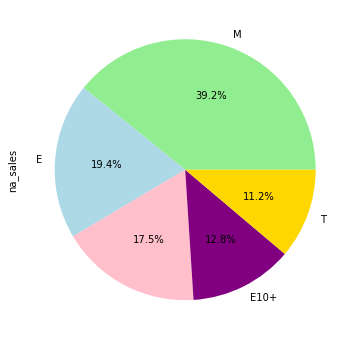

In [38]:
#самые популярные игры по возрастному рейтингу в Северной Америке
colors = ['lightgreen', 'lightblue', 'pink', 'purple', 'gold']
(actual_games
 .groupby('rating')
 .agg(na_sales=('na_sales', 'sum'))
 .sort_values(by='na_sales', ascending=False)
 .head()
 .plot(y='na_sales', kind='pie', autopct='%1.1f%%', colors=colors, figsize=(6, 6), legend=False)
)
plt.show()

Выводы по Северной Америке:

1. Самые популярные платформы у игроков в Северной Америке - PS4, Xbox One. Причём заметно, что они занимают почти 2/3 всего рынка. Меньше всего доля пользователей на PC (6.1%)
2. Самые популярные игры в жанре Action и Shooter
3. Игры с рейтингом M (17+ лет) самые популярные (почти 33% продаж). Дальше следуют игры с рейтингом E (6+ лет) с долей в 20.4% продаж. Закрывают игры с рейтингом Е10+ и T (13+ лет), их доли продаж почти равны (12.4% и 11.9%)

### Самые популярные платформы и жанры (топ 5) в Европе

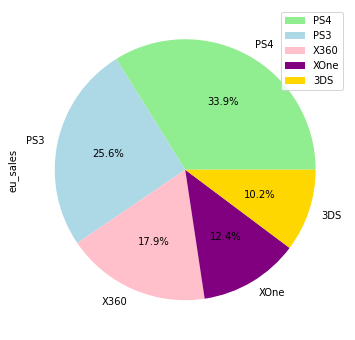

In [39]:
#самые популярные платформы пользователей в Европе
colors = ['lightgreen', 'lightblue', 'pink', 'purple', 'gold']
eu_region = (actual_games
             .groupby('platform')
             .agg(eu_sales=('eu_sales', 'sum'))
             .sort_values(by='eu_sales', ascending=False)
             .head()
             .plot(y='eu_sales', kind='pie', autopct='%1.1f%%', colors=colors, figsize=(6, 6))
            )
plt.show()

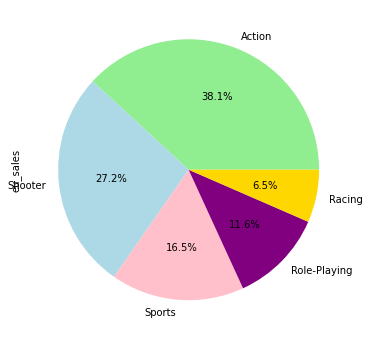

In [40]:
#самые популярные жанры в Европе
colors = ['lightgreen', 'lightblue', 'pink', 'purple', 'gold']
eu_region = (actual_games
             .groupby('genre')
             .agg(eu_sales=('eu_sales', 'sum'))
             .sort_values(by='eu_sales', ascending=False)
             .head()
             .plot(y='eu_sales', kind='pie', autopct='%1.1f%%', colors=colors, figsize=(6, 6), legend=False)
            )
plt.show()

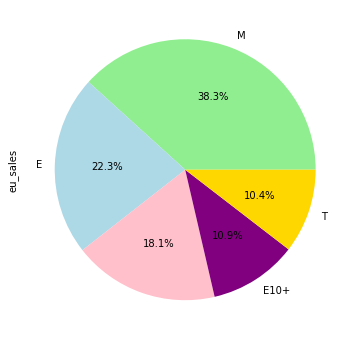

In [41]:
#самые популярные игры по возрастному рейтингу в Европе
colors = ['lightgreen', 'lightblue', 'pink', 'purple', 'gold']
eu_region = (actual_games
             .groupby('rating')
             .agg(eu_sales=('eu_sales', 'sum'))
             .sort_values(by='eu_sales', ascending=False)
             .head()
             .plot(y='eu_sales', kind='pie', autopct='%1.1f%%', colors=colors, figsize=(6, 6), legend=False)
            )
plt.show()

Выводы по Европе:

1. Самая популярная платформа у игроков в Европе - PS4. На PS4 приходится почти 50% всех продаж. Меньше всего доля пользователей на WiiU (8.4%)
2. Самые популярные игры в жанре Action и Shooter
3. Игры с рейтингом M (17+ лет) самые популярные (34% продаж). Дальше следуют игры с рейтингом E (6+ лет) с долей в 22.6% продаж. Закрывают игры с рейтингом Е10+ и T (13+ лет), их доли продаж почти равны (9.6% и 11.6%)

### Самые популярные платформы и жанры (топ 5) в Японии

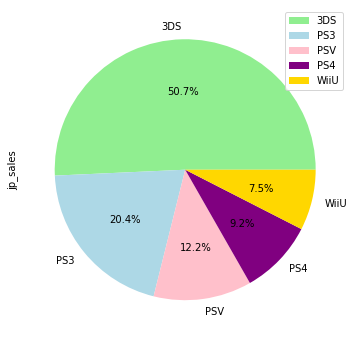

In [42]:
#самые популярные платформы пользователей в Японии
colors = ['lightgreen', 'lightblue', 'pink', 'purple', 'gold']
jp_region = (actual_games
             .groupby('platform')
             .agg(jp_sales=('jp_sales', 'sum'))
             .sort_values(by='jp_sales', ascending=False)
             .head()
             .plot(y='jp_sales', kind='pie', autopct='%1.1f%%', colors=colors, figsize=(6, 6))
            )
plt.show()

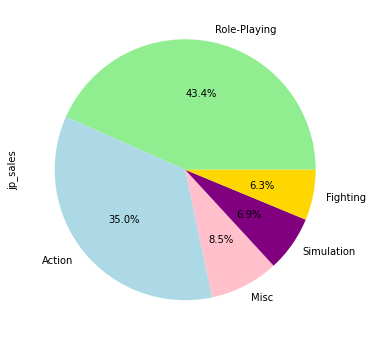

In [43]:
#самые популярные жанры в Японии
colors = ['lightgreen', 'lightblue', 'pink', 'purple', 'gold']
jp_region = (actual_games
             .groupby('genre')
             .agg(jp_sales=('jp_sales', 'sum'))
             .sort_values(by='jp_sales', ascending=False)
             .head()
             .plot(y='jp_sales', kind='pie', autopct='%1.1f%%', colors=colors, figsize=(6, 6), legend=False)
            )
plt.show()

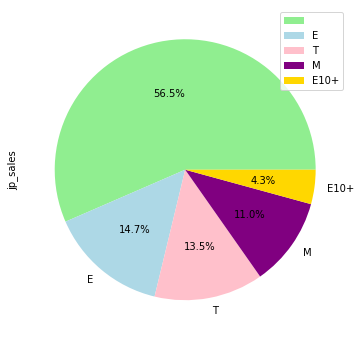

In [44]:
#самые популярные игры по возрастному рейтингу в Японии
colors = ['lightgreen', 'lightblue', 'pink', 'purple', 'gold']
jp_region = (actual_games
             .groupby('rating')
             .agg(jp_sales=('jp_sales', 'sum'))
             .sort_values(by='jp_sales', ascending=False)
             .head()
             .plot(y='jp_sales', kind='pie', autopct='%1.1f%%', colors=colors, figsize=(6, 6))
            )
plt.show()

Выводы по Японии:

1. Самая популярная платформа у игроков в Японии - 3DS. На 3DS приходится 75% всех продаж. Следом идут PS4 и WiiU с 13.6% и 11.1% продаж. На Xbox One приходится всего 0.3% продаж, а PC не представлен вовсе.
2. Самые популярные игры в жанре Role-Playing и Action.
3. Игры с рейтингом E (6+ лет) самые популярные (20.4% продаж). Дальше следуют игры с рейтингом T (13+ лет) с долей в 8.2% продаж. Закрывают игры с рейтингом Е10+ и M (17+ лет), их доли продаж почти равны (6.3% и 6.1%)

Видим, что 59% всех игр не имееют пустой рейтинг, напомним, что пустой рейтинг мы установили, чтобы убрать пропущенные значения. Вполне вероятно, что такой пробел в данных из-за того, что в Японии есть своя классификация по рейтингам, которая не представлена в датасете.

**Выводы при нацеленности на тот или иной регион**

Наблюдаем сильное отличие Японского региона от Европейского региона и Северной Америке.
* В Европе и Северной Америке преобладают платформы PS4 и Xbox One, а в Японии очень сильно лидирует 3DS.
* В Европе и Северной Америке жанры не сильно отличаются друг от друга по популярности: Action 33% - 31%, Shooter 29% - 28%. Остальные жанры тоже имеют ± одинаковое распределение. А вот в Японии самые популярные игры в жанре Role-Playing (44.6% продаж) и Action (28.3% продаж).
* В Европе и Северной Америке преобладают игры с рейтингом M, а в Японии с рейтингом E

## Проверим и поясним гипотезы 

### Проверка гипотезы: средние пользовательские рейтинги платформ Xbox One и PC одинаковые

```
H_0: Средние пользовательские рейтинги платформы Xbox One = средние пользовательские рейтинги PC`
H_a: Средние пользовательские рейтинги платформы Xbox One ≠ средние пользовательские рейтинги PC`
alpha = 0.05
```
Как нулевую гипотезу мы приняли, что пользовательские рейтинги Xbox One и PC равны. Альтернативной будет то, что они не равны, ибо рейтинг может быть меньше или больше.

In [45]:
from scipy import stats as st

In [46]:
x_one = actual_games[actual_games['platform'] == 'XOne']['user_score']
pc = actual_games[actual_games['platform'] == 'PC']['user_score']

#чтобы нам не мешались пропущенные значения, то уберём их для этой проверки
pc = pc.dropna()
x_one = x_one.dropna()

results = st.ttest_ind(x_one, pc, equal_var = False) #поскольку выборки разного размера, то в equal_var укажем False

alpha = 0.05

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


Значение p-value показывает: вероятность случайно получить значение при сравнении средних оценок платформ равно почти 55%. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между рейтингами Xbox One и PC. 

Нам не удалось отвергнуть нулевую гипотезу

In [47]:
#просмотрим среднее и проверим значения
(actual_games
 .query('platform == "XOne" or platform == "PC"')
 .pivot_table(index='platform', values='user_score'))

,user_score
platform,
PC,6.428641
XOne,6.521429


Оценки двух платформ очень близки по среднему 

### Проверка гипотезы: средние пользовательские рейтинги жанров Action и Sports разные

```
H_0: Средние пользовательские рейтинги жанра Action = средние пользовательские рейтинги жанра Sports`
H_a: Средние пользовательские рейтинги жанра Action ≠ средние пользовательские рейтинги жанра Sports`
alpha = 0.05

```
Как нулевую гипотезу мы приняли, что пользовательские рейтинги жанра Action и Sports равны. Альтернативной будет то, что они не равны, ибо рейтинг может быть меньше или больше.

In [48]:
action = actual_games[actual_games['genre'] == 'Action']['user_score']
sports = actual_games[actual_games['genre'] == 'Sports']['user_score']

#чтобы нам не мешались пропущенные значения, то уберём их для этой проверки
action = action.dropna()
sports = sports.dropna()

results = st.ttest_ind(action, sports, equal_var = False) #поскольку выборки разного размера, то в equal_var укажем False

alpha = 0.05

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 4.24307776572644e-20
Отвергаем нулевую гипотезу


Значение p-value показывает: что на имеющихся данных, на уровне значимости 5% есть основания отвергнуть нулевую гипотезу о равенстве средних значений пользовательских рейтингов (отзывов) жанров Action и Sports в пользу альтернативной гипотезы.

Мы отвергаем нулевую гипотезу

In [49]:
#просмотрим среднее и проверим значения
(actual_games
 .query('genre == "Action" or genre == "Sports"')
 .pivot_table(index='genre', values='user_score'))

,user_score
genre,
Action,6.825048
Sports,5.455897


Видно, что оценки довольно сильно отличаются по среднему.

**Выводы**

Мы проверили две гипотезы:
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
2. Средние пользовательские рейтинги жанров Action и Sports разные

Для проверки обеих гипотез мы использовали метод для проверки равенства среднего двух генеральных совокупностей по взятым из них выборкам. Выбрали этот метод по той причине, что мы должны именно сравнивать средние двух генеральных совокупностей между собой

* В первой гипотезе вероятность случайно получить значение при сравнении средних оценок платформ равно почти 55%. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между рейтингами Xbox One и PC. Гипотезу подтверждаем
* Вторая гипотеза. На имеющихся данных, на уровне значимости 5% есть основания отвергнуть нулевую гипотезу о равенстве средних значений пользовательских рейтингов (отзывов) жанров Action и Sports в пользу альтернативной гипотезы. Гипотеза подтверждена

## Общий вывод

В ходе исследования мы изучили исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы - доступные из открытых источников. После изучения общей информации мы приступили к предобработке.

На этапе предобработки мы проделали следующее:
* привели названия столбцов к одному стилю
* избавились от пропусков там, где это было возможно
* изменили тип данных на нужный
* создали новый столбец с суммарными продажами по всем регионам
* проверили на дубликаты и аномалии

Во время работы с данными мы выявили следующие интересные особенности и зависимости:
* Выявили, что нам необходимы не все данные, а только за определённый период (с 2012 года по текущий) по популярным платформам (PS4, Xbox One, 3DS, WiiU, PC).
* Узнали, что топ 5 игровых платформ по продажам за всё время это PS2, X360, PS3, Wii, DS. Явный лидер - PS2 с 1.2 млрд. продаж
* Определили, что отзывы игроков практически не влияют на продажи, а вот отзывы критиков имеют небольшое влияние на продажи. 
* Определили самые прибыльные жанры - Shooter, Role-Playing, Action, Sports.

Составили портрет пользователей по регионам и выявили, что Северная Америка очень схожа с Европой, а вот Япония очень сильно отличается от них.

Мы проверили две гипотезы и установили:

1. Cредние пользовательские рейтинги платформ Xbox One и PC одинаковые

Вероятность случайно получить значение при сравнении средних оценок платформ равно почти 55%. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между рейтингами Xbox One и PC.
Первая гипотеза подтвердилась.

2. Средние пользовательские рейтинги жанров Action и Sports разные

На имеющихся данных, на уровне значимости 5% есть основания отвергнуть нулевую гипотезу о равенстве средних значений пользовательских рейтингов (отзывов) жанров Action и Sports в пользу альтернативной гипотезы.
Вторая гипотеза подтвердилась.

**ИТОГ**

Мы можем сказать, что успех игр зависит от множества параметров: платформа, жанр, оценок, возрастного рейтинга. Можно дать следующие рекомендации, чтобы сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на 2017 год.
* Игра должна быть на одной из популярных платформ - PS4, Xbox One, 3DS, WiiU, PC
* Быть в одном из популярных жанров - Shooter, Role-Playing, Action, Sports
* Иметь возрастной рейтинг M или Е
* Иметь хорошие отзывы критиков и игроков

Ещё нужно учитывать регион, в котором планируются продажи:

* В Европе и Северной Америке преобладают платформы PS4 и Xbox One, а в Японии очень сильно лидирует 3DS.
* В Европе и Северной Америке жанры не сильно отличаются друг от друга по популярности: Action 33% - 31%, Shooter 29% - 28%. Остальные жанры тоже имеют ± одинаковое распределение. А вот в Японии самые популярные игры в жанре Role-Playing (44.6% продаж) и Action (28.3% продаж).
* В Европе и Северной Америке преобладают игры с рейтингом M, а в Японии с рейтингом E